Member 1:

SRN: PES1UG21CS929  Name: Riya Bansal

Member 2:

SRN: PES1UG21CS141  Name: Deepthi Bommisetty

Member 3:

SRN: PES1UG21CS137  Name: Bhavana Hugar

Member 4:

SRN: PES1UG21CS416  Name: Pragya Srivastava

book : Pride and Prejudice (Jane Austen)

url: https://www.gutenberg.org/cache/epub/1342/pg1342.txt

**Social graph summary**

Nodes: elizabeth, darcy, bingley, jane, wickham, collins, lydia, catherine, gardiner, charlotte, lucas, kitty, george, william, mary

Edges:
- elizabeth to darcy
- elizabeth to bingley
- elizabeth to jane
- elizabeth to wickham
- elizabeth to collins
- elizabeth to lydia
- elizabeth to catherine
- elizabeth to gardiner
- elizabeth to charlotte
- elizabeth to lucas
- elizabeth to kitty
- elizabeth to george
- elizabeth to william
- elizabeth to mary
- darcy to bingley
- darcy to jane
- darcy to wickham
- darcy to collins
- darcy to lydia
- darcy to catherine
- darcy to gardiner
- darcy to charlotte
- darcy to lucas
- darcy to kitty
- darcy to george
- darcy to william
- darcy to mary
- bingley to jane
- bingley to wickham
- bingley to collins
- bingley to lydia
- bingley to catherine
- bingley to gardiner
- bingley to charlotte
- bingley to lucas
- bingley to kitty
- bingley to george
- bingley to william
- bingley to mary
- jane to wickham
- jane to collins
- jane to lydia
- jane to catherine
- jane to gardiner
- jane to charlotte
- jane to lucas
- jane to kitty
- jane to george
- jane to william
- jane to mary
- wickham to collins
- wickham to lydia
- wickham to catherine
- wickham to gardiner
- wickham to charlotte
- wickham to lucas
- wickham to kitty
- wickham to george
- wickham to mary
- collins to lydia
- collins to catherine
- collins to gardiner
- collins to charlotte
- collins to lucas
- collins to kitty
- collins to george
- collins to william
- collins to mary
- lydia to catherine
- lydia to gardiner
- lydia to charlotte
- lydia to lucas
- lydia to kitty
- lydia to george
- lydia to william
- lydia to mary
- catherine to charlotte
- catherine to lucas
- catherine to kitty
- catherine to george
- catherine to william
- catherine to mary
- gardiner to charlotte
- gardiner to kitty
- gardiner to george
- gardiner to mary
- charlotte to lucas
- charlotte to kitty
- charlotte to george
- charlotte to william
- lucas to kitty
- lucas to george
- lucas to william
- lucas to mary
- kitty to george
- kitty to mary
- george to william
- george to mary
- william to mary

In [ ]:
pip install spacy json pandas numpy networkx matplotlib pathlib2 afinn nltk scikit-learn


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [ ]:
pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=ee76dd804157dfff708e72143899527bce338cb4fa1d4cbe232c04e1fced918e
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
!python -m spacy download en_core_web_sm



2023-11-20 06:43:06.009733: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 06:43:06.009819: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 06:43:06.009861: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 06:43:06.019571: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-20 06:43:07.716304: W tensorflow/compiler/

In [ ]:
import nltk
nltk.download('punkt')
from networkx.algorithms.community import k_clique_communities, girvan_newman, greedy_modularity_communities
import re
from collections import Counter
import codecs
import os
import spacy
import json
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
from afinn import Afinn
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Question 1: a, b and f

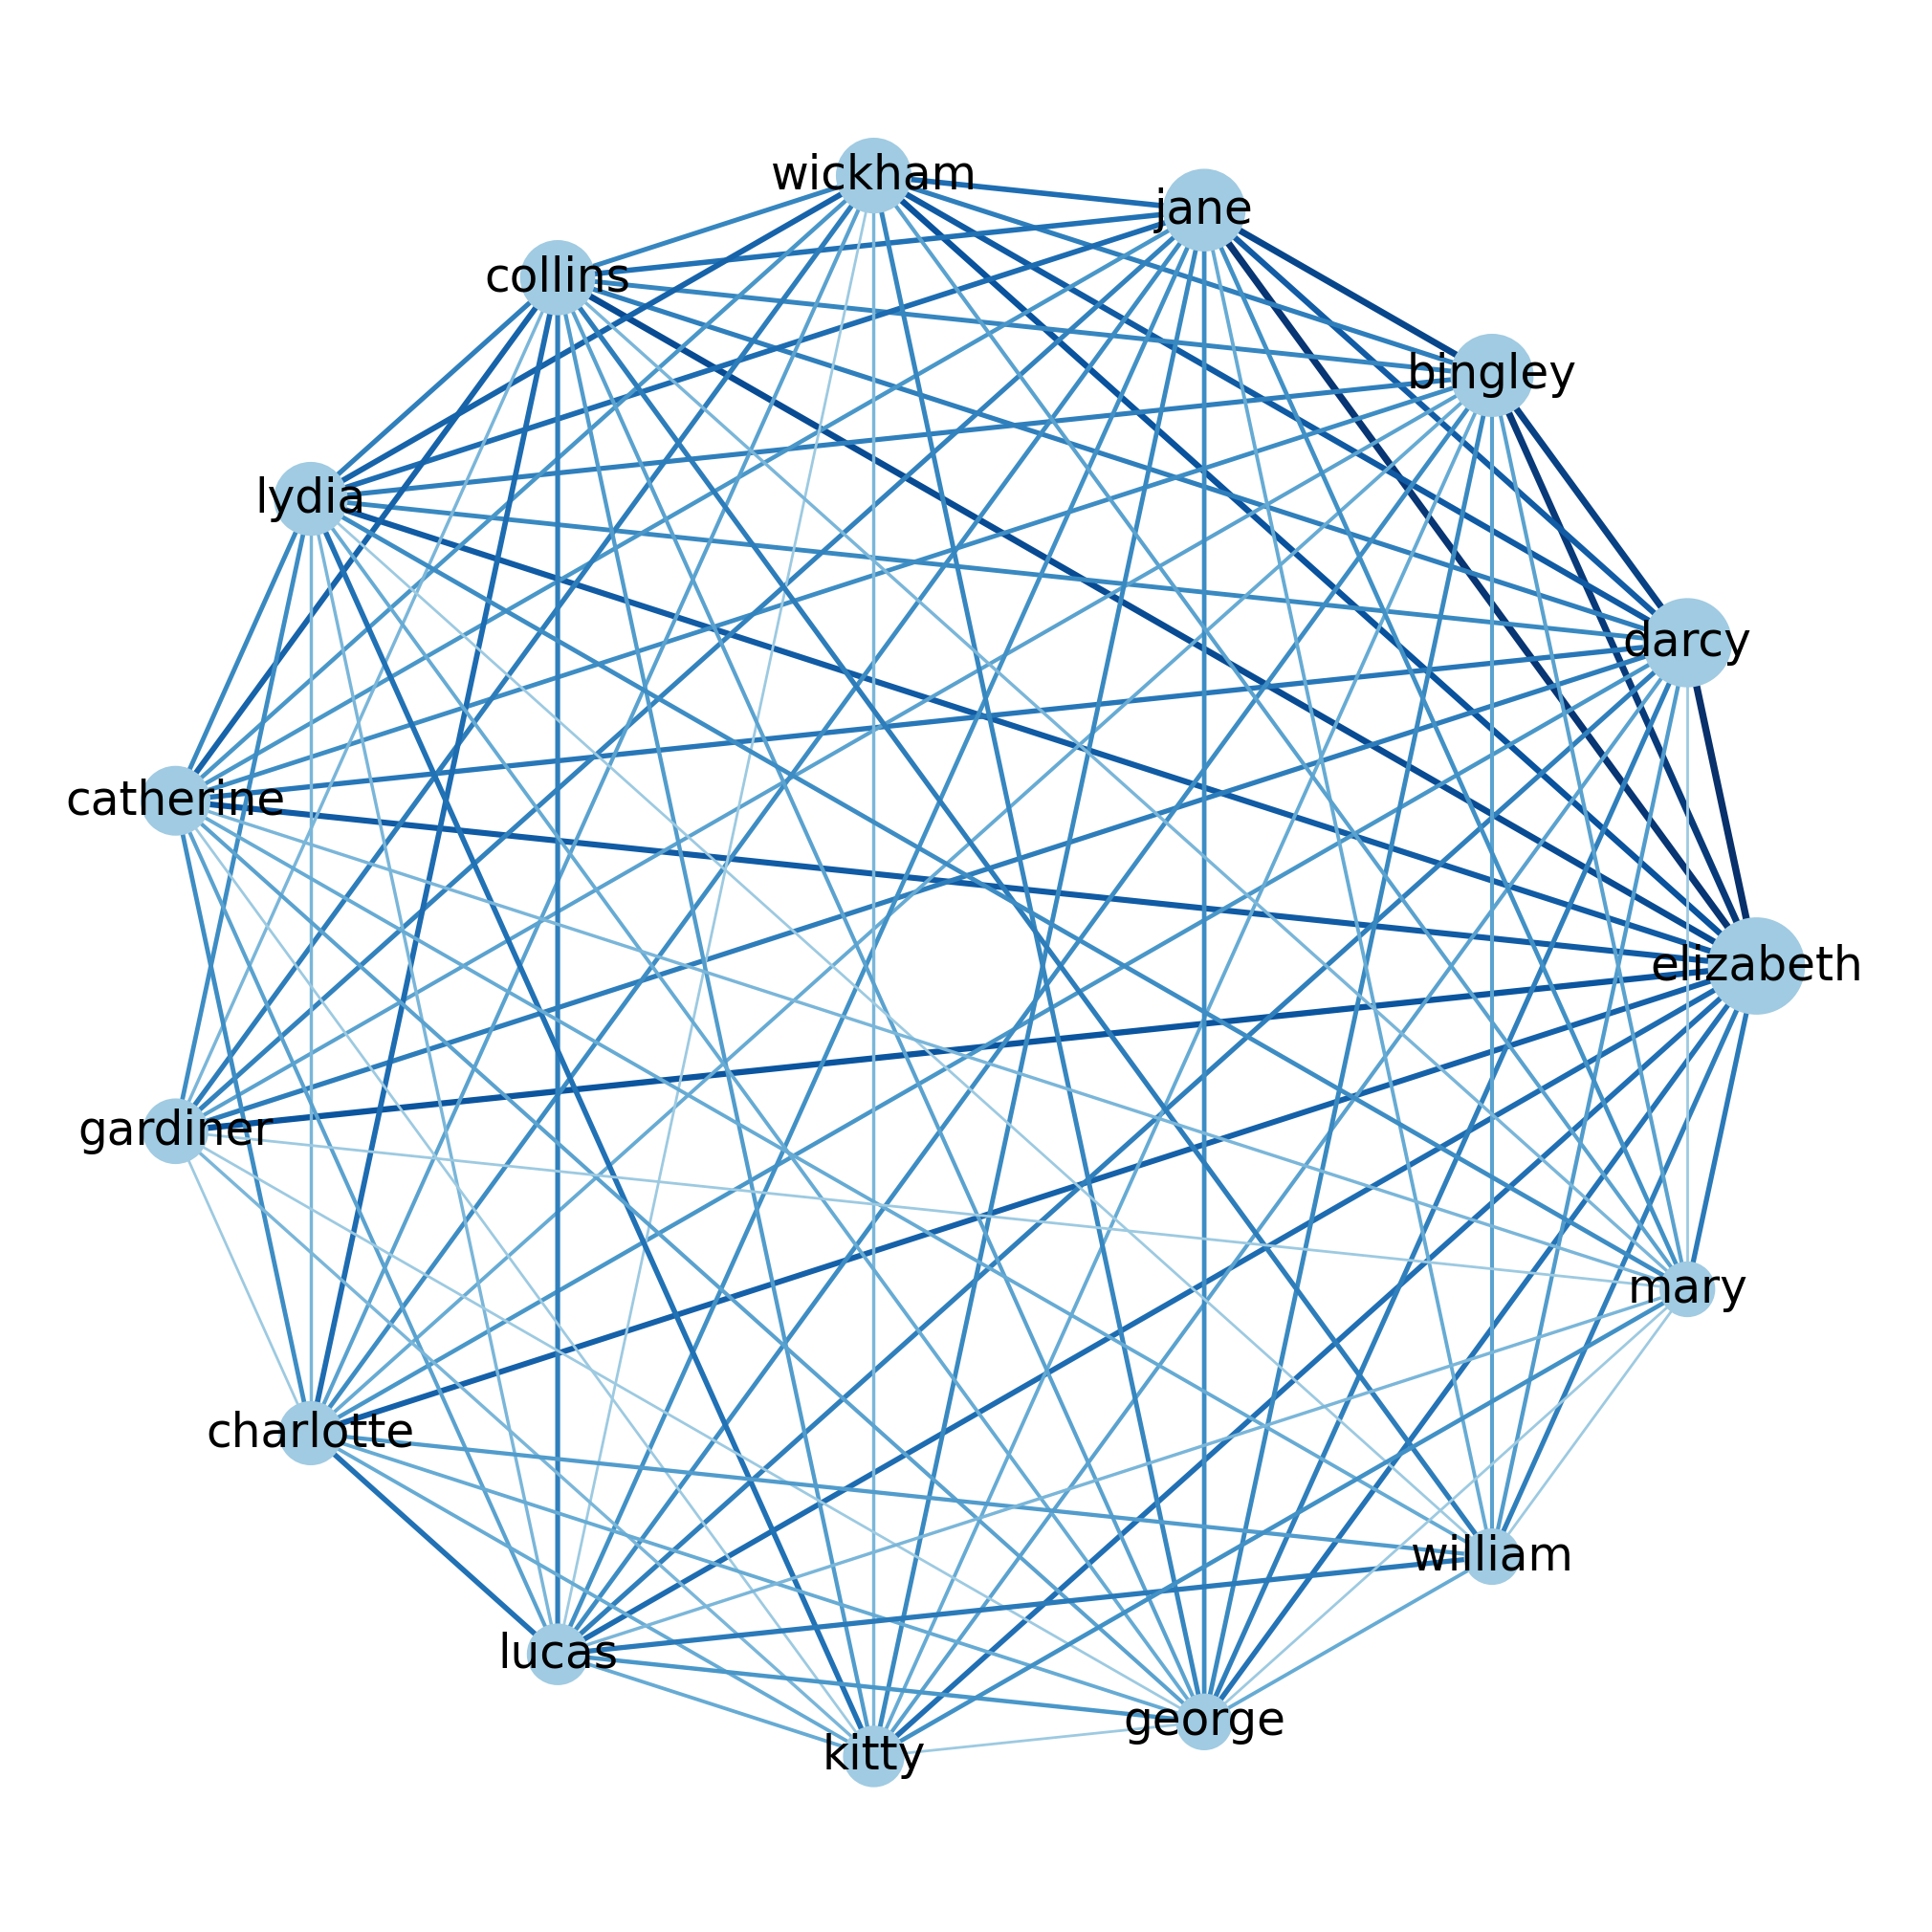

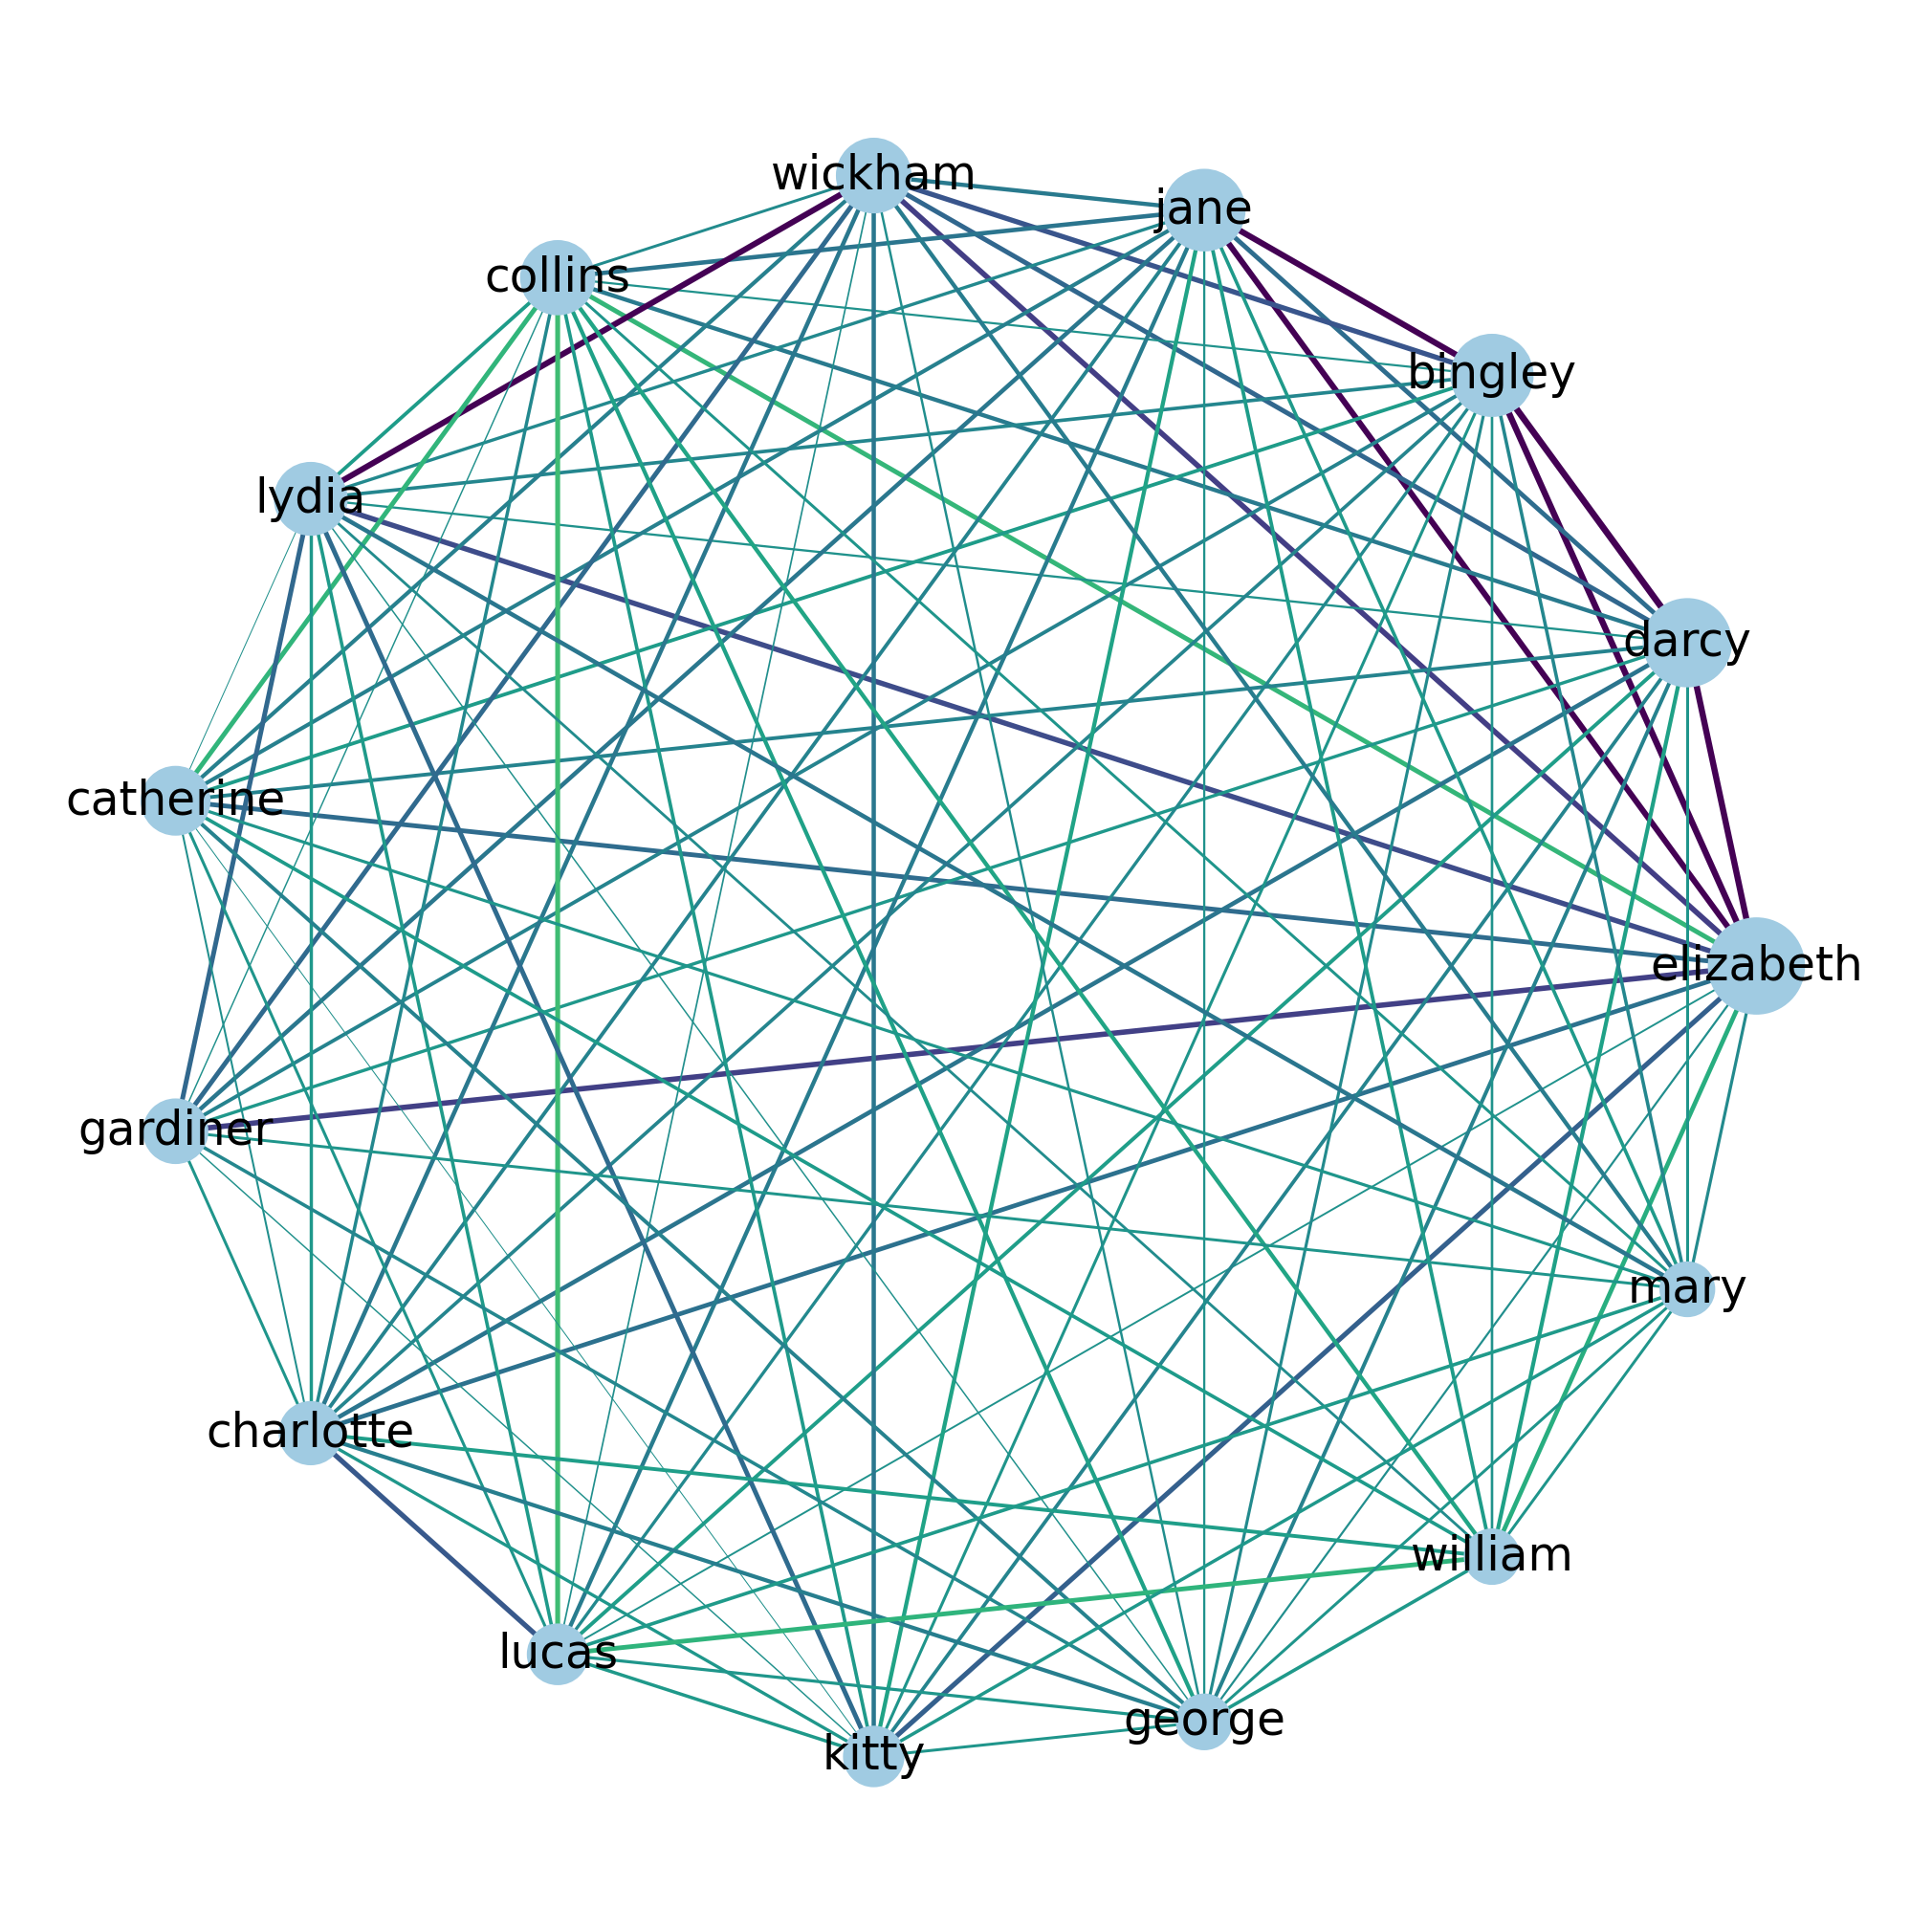

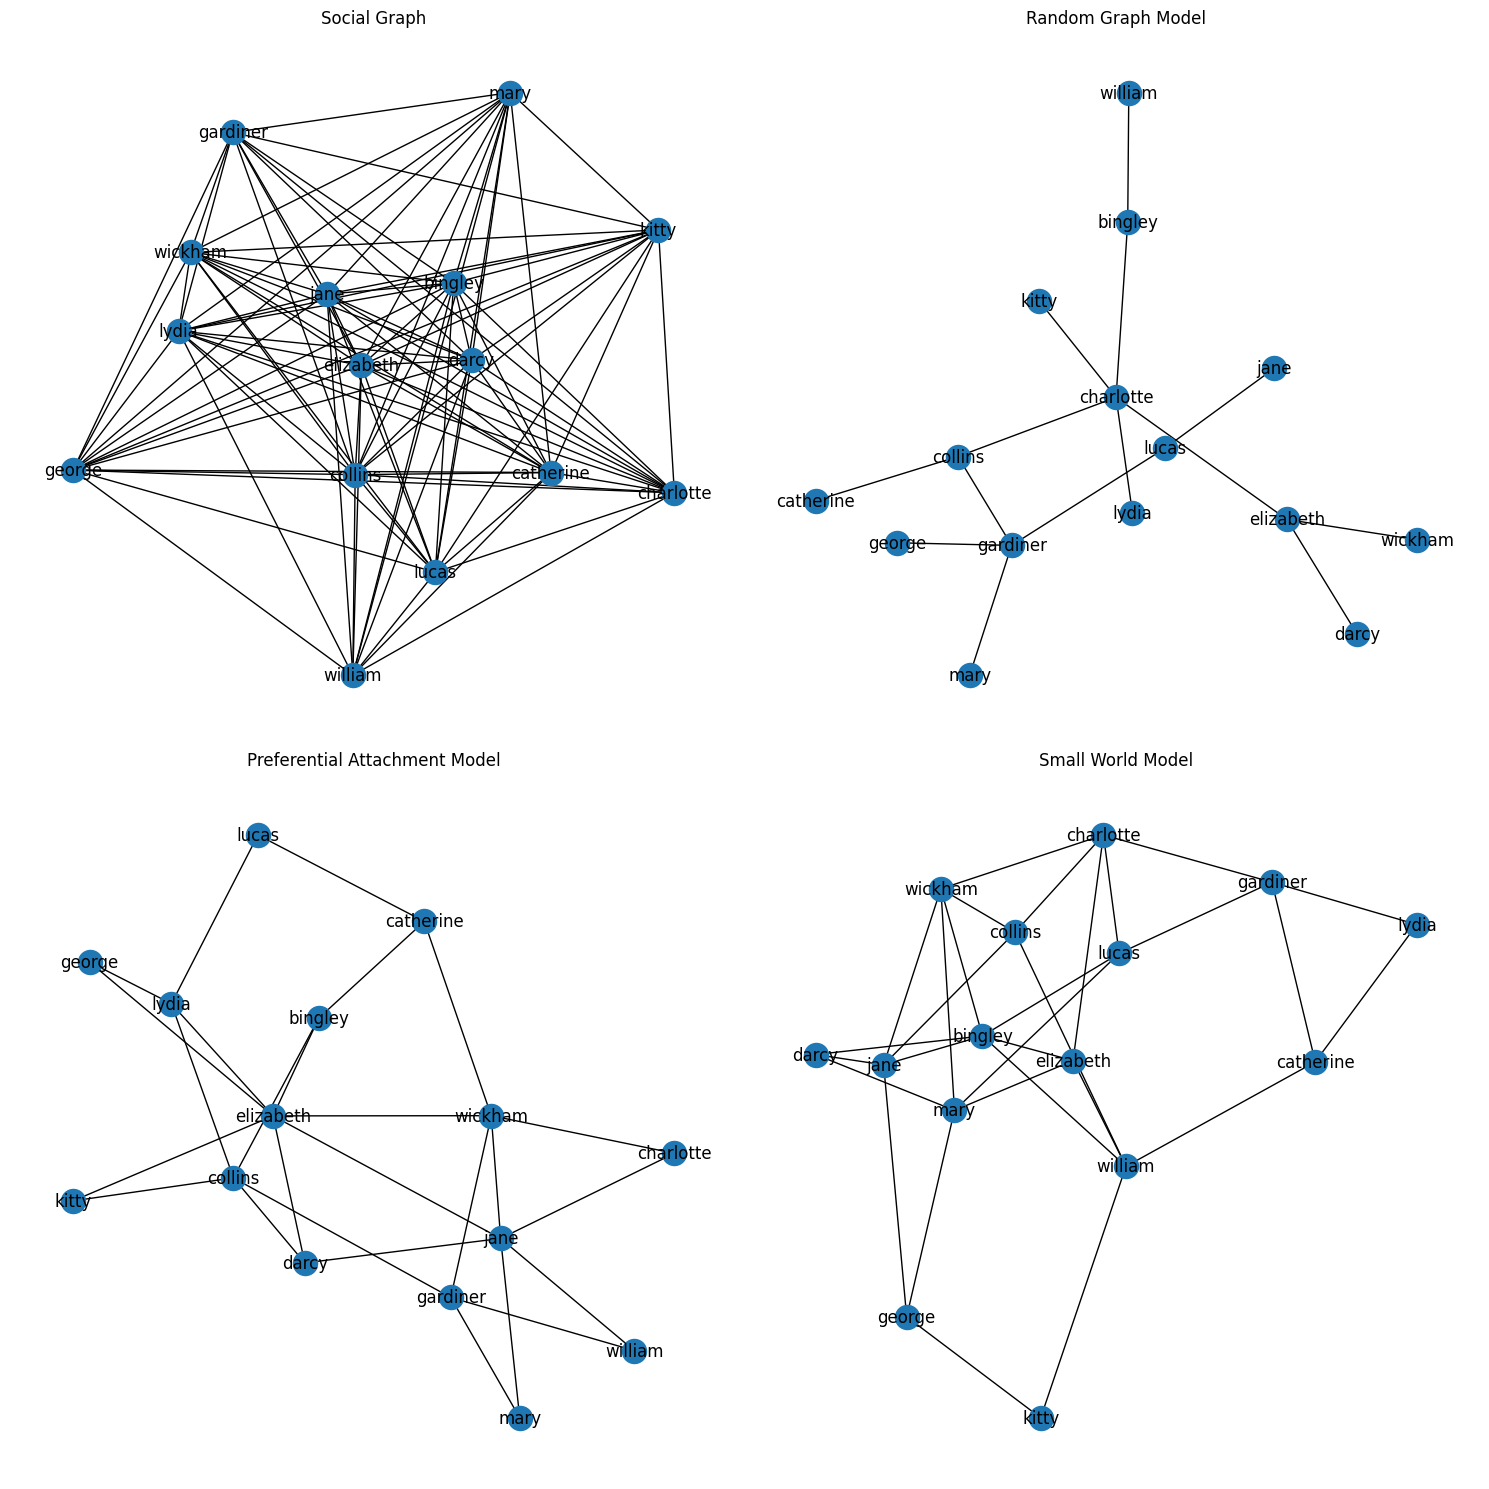

In [ ]:

nlp = spacy.load('en_core_web_sm')

def common_words(path):
    return set()

def read_novel(path):
    with codecs.open(path, 'r', encoding='utf-8', errors='ignore') as f:
        data = f.read().replace('\r', ' ').replace('\n', ' ').replace("\'", "'")
    return data

def iterative_NER(sentence_list, threshold_rate=0.0005, manual_character_list=[]):
    output = []
    for i in sentence_list:
        name_list = name_entity_recognition(i, manual_character_list)
        if name_list != []:
            output.append(name_list)
    output = flatten(output)
    from collections import Counter
    output = Counter(output)
    output = [x for x in output if output[x] >= threshold_rate * len(sentence_list)]
    return output

def top_names(name_list, novel, top_num=30):
    vect = CountVectorizer(vocabulary=name_list, stop_words='english')
    name_frequency = vect.fit_transform([novel.lower()])
    name_frequency = pd.DataFrame(name_frequency.toarray(), columns=vect.get_feature_names_out())
    name_frequency = name_frequency.T
    name_frequency = name_frequency.sort_values(by=0, ascending=False)
    name_frequency = name_frequency[0:top_num]
    names = list(name_frequency.index)
    name_frequency = list(name_frequency[0])
    return name_frequency, names

def calculate_align_rate(sentence_list):
    afinn = SentimentIntensityAnalyzer()
    sentiment_score = [afinn.polarity_scores(x)['compound'] for x in sentence_list]
    align_rate = np.sum(sentiment_score) / len(np.nonzero(sentiment_score)[0]) * -2
    return align_rate

def calculate_matrix(name_list, sentence_list, align_rate):
    afinn = SentimentIntensityAnalyzer()
    sentiment_score = [afinn.polarity_scores(x)['compound'] for x in sentence_list]
    name_vect = CountVectorizer(vocabulary=name_list, binary=True)
    occurrence_each_sentence = name_vect.fit_transform(sentence_list).toarray()
    cooccurrence_matrix = np.dot(occurrence_each_sentence.T, occurrence_each_sentence)
    sentiment_matrix = np.dot(occurrence_each_sentence.T, (occurrence_each_sentence.T * sentiment_score).T)
    sentiment_matrix += align_rate * cooccurrence_matrix
    cooccurrence_matrix = np.tril(cooccurrence_matrix)
    sentiment_matrix = np.tril(sentiment_matrix)
    shape = cooccurrence_matrix.shape[0]
    cooccurrence_matrix[[range(shape)], [range(shape)]] = 0
    sentiment_matrix[[range(shape)], [range(shape)]] = 0
    return cooccurrence_matrix, sentiment_matrix

def matrix_to_edge_list(matrix, mode, name_list):
    edge_list = []
    shape = matrix.shape[0]
    lower_tri_loc = list(zip(*np.where(np.triu(np.ones([shape, shape])) == 0)))
    normalized_matrix = matrix / np.max(np.abs(matrix))
    if mode == 'co-occurrence':
        weight = np.log(2000 * normalized_matrix + 1) * 0.7
        color = np.log(2000 * normalized_matrix + 1)
    if mode == 'sentiment':
        weight = np.log(np.abs(1000 * normalized_matrix) + 1) * 0.7
        color = 2000 * normalized_matrix
    for i in lower_tri_loc:
        edge_list.append((name_list[i[0]], name_list[i[1]], {'weight': weight[i], 'color': color[i]}))
    return edge_list

def plot_graph(name_list, name_frequency, matrix, plt_name, mode, path=''):
    label = {i: i for i in name_list}
    edge_list = matrix_to_edge_list(matrix, mode, name_list)
    normalized_frequency = np.array(name_frequency) / np.max(name_frequency)

    plt.figure(figsize=(20, 20))
    G = nx.Graph()
    G.add_nodes_from(name_list)
    G.add_edges_from(edge_list)
    pos = nx.circular_layout(G)

    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    colors = [G[u][v]['color'] for u, v in edges]

    if mode == 'co-occurrence':
        nx.draw(G, pos, node_color='#A0CBE2', node_size=np.sqrt(normalized_frequency) * 4000, edge_cmap=plt.cm.Blues,
                linewidths=10, font_size=35, labels=label, edge_color=colors, with_labels=True, width=weights)
    elif mode == 'sentiment':
        nx.draw(G, pos, node_color='#A0CBE2', node_size=np.sqrt(normalized_frequency) * 4000,
                linewidths=10, font_size=35, labels=label, edge_color=colors, with_labels=True,
                width=weights, edge_vmin=-1000, edge_vmax=1000)
    else:
        raise ValueError("mode should be either 'co-occurrence' or 'sentiment'")

    plt.savefig(path + plt_name + '.png')

def name_entity_recognition(sentence, manual_character_list=[]):
    doc = nlp(sentence)
    name_entity = [x.text.lower() for x in doc.ents if x.label_ in ['PERSON', 'ORG']]
    name_entity = [x.split(' ') for x in name_entity]
    name_entity = flatten(name_entity)
    name_entity = [x for x in name_entity if len(x) >= 3]
    name_entity = [x for x in name_entity if x not in common_words('common_words.txt')]

    # Recognize Lizzy as Elizabeth
    for i, name in enumerate(name_entity):
        if name == 'lizzy':
            name_entity[i] = 'elizabeth'

    # Filter out names not in the manual list
    name_entity = [name for name in name_entity if name in manual_character_list]

    return name_entity

if __name__ == '__main__':
    novel_path = '/content/prideprejudice.txt'
    novel = read_novel(novel_path)
    sentence_list = sent_tokenize(novel)
    align_rate = calculate_align_rate(sentence_list)

    manual_character_list = ['elizabeth', 'darcy', 'bingley', 'jane', 'wickham', 'collins', 'lydia', 'catherine', 'gardiner', 'charlotte', 'lucas', 'kitty', 'george', 'william', 'mary']

    name_frequency, name_list = top_names(manual_character_list, novel, len(manual_character_list))
    cooccurrence_matrix, sentiment_matrix = calculate_matrix(name_list, sentence_list, align_rate)


    plot_graph(name_list, name_frequency, cooccurrence_matrix, 'cooccurrence', 'co-occurrence', path='/content/')
    plot_graph(name_list, name_frequency, sentiment_matrix, 'sentiment', 'sentiment', path='/content/')

     # Create a mapping between numeric labels and character names
    numeric_mapping = {i: name_list[i] for i in range(len(name_list))}

    # Extracting the social graph from the co-occurrence matrix
    social_graph = nx.Graph(cooccurrence_matrix)

    # Convert numeric labels to character names for the social graph
    social_graph_named = nx.relabel_nodes(social_graph, numeric_mapping)

   # Generating Random Graph Model
    random_graph = nx.erdos_renyi_graph(len(manual_character_list), p=0.2)

    # Generating Preferential Attachment Model
    preferential_attachment_graph = nx.barabasi_albert_graph(len(manual_character_list), m=2)

    # Generating Small World Model
    small_world_graph = nx.watts_strogatz_graph(len(manual_character_list), k=4, p=0.3)

    random_graph_named = nx.relabel_nodes(random_graph, numeric_mapping)
    preferential_attachment_graph_named = nx.relabel_nodes(preferential_attachment_graph, numeric_mapping)
    small_world_graph_named = nx.relabel_nodes(small_world_graph, numeric_mapping)

    # Visualizing the graphs
    plt.figure(figsize=(15, 15))

    plt.subplot(2, 2, 1)
    plt.title("Social Graph")
    nx.draw(social_graph_named, with_labels=True)

    plt.subplot(2, 2, 2)
    plt.title("Random Graph Model")
    nx.draw(random_graph_named, with_labels=True)

    plt.subplot(2, 2, 3)
    plt.title("Preferential Attachment Model")
    nx.draw(preferential_attachment_graph_named, with_labels=True)

    plt.subplot(2, 2, 4)
    plt.title("Small World Model")
    nx.draw(small_world_graph_named, with_labels=True)

    plt.tight_layout()
    plt.show()


Question 1: c and d

In [ ]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(social_graph_named)
betweenness_centrality = nx.betweenness_centrality(social_graph_named)
closeness_centrality = nx.closeness_centrality(social_graph_named)
pagerank_centrality = nx.pagerank(social_graph_named)

print("Degree Centrality:")
print(degree_centrality)

print("\nBetweenness Centrality:")
print(betweenness_centrality)

print("\nCloseness Centrality:")
print(closeness_centrality)

print("\nPageRank Centrality:")
print(pagerank_centrality)


# Extract the Ego network for the main protagonist (elizabeth)
main_protagonist = 'elizabeth'
ego_network = nx.ego_graph(social_graph_named, main_protagonist)
local_clustering_coefficient = nx.clustering(ego_network)

# Print the local clustering coefficient
print("\nLocal Clustering Coefficient:")
print(local_clustering_coefficient)


Degree Centrality:
{'elizabeth': 1.0, 'darcy': 1.0, 'bingley': 1.0, 'jane': 1.0, 'wickham': 0.9285714285714285, 'collins': 1.0, 'lydia': 1.0, 'catherine': 0.9285714285714285, 'gardiner': 0.7857142857142857, 'charlotte': 0.9285714285714285, 'lucas': 0.9285714285714285, 'kitty': 0.9285714285714285, 'george': 1.0, 'william': 0.7857142857142857, 'mary': 0.9285714285714285}

Betweenness Centrality:
{'elizabeth': 0.0060623137546214475, 'darcy': 0.0060623137546214475, 'bingley': 0.0060623137546214475, 'jane': 0.0060623137546214475, 'wickham': 0.002843310535618228, 'collins': 0.0060623137546214475, 'lydia': 0.0060623137546214475, 'catherine': 0.002843310535618228, 'gardiner': 0.0008453085376162301, 'charlotte': 0.005217005217005218, 'lucas': 0.002843310535618228, 'kitty': 0.002843310535618228, 'george': 0.0060623137546214475, 'william': 0.0008453085376162301, 'mary': 0.005217005217005218}

Closeness Centrality:
{'elizabeth': 1.0, 'darcy': 1.0, 'bingley': 1.0, 'jane': 1.0, 'wickham': 0.93333333

Question 1: e

In [ ]:
# Clique Percolation Method
cliques = list(k_clique_communities(social_graph_named, 3))

# Girvan Newman
comp = girvan_newman(social_graph_named)

community_girvan_newman = tuple(sorted(c) for c in next(comp))

# Louvain algorithm (Modularity-based)
community_louvain = list(greedy_modularity_communities(social_graph_named))

print("Clique Percolation Method Communities:", cliques)
print("Girvan Newman Communities:", community_girvan_newman)
print("Louvain Algorithm Communities:", community_louvain)

Clique Percolation Method Communities: [frozenset({'kitty', 'lydia', 'wickham', 'gardiner', 'elizabeth', 'lucas', 'bingley', 'mary', 'catherine', 'jane', 'george', 'william', 'charlotte', 'collins', 'darcy'})]
Girvan Newman Communities: (['bingley', 'catherine', 'charlotte', 'collins', 'darcy', 'elizabeth', 'george', 'jane', 'kitty', 'lucas', 'lydia', 'mary', 'wickham', 'william'], ['gardiner'])
Louvain Algorithm Communities: [frozenset({'kitty', 'wickham', 'lydia', 'william', 'gardiner', 'elizabeth', 'charlotte', 'lucas', 'mary', 'bingley', 'catherine', 'collins', 'darcy', 'jane', 'george'})]


Question 2.

Analysis:


Theme:
Jane Austens's beloved Pride and Prejudice is a popular read amongst younger and older generations alike. It has been well established that the book revolves around the unlikely romance of a headstrong and articulate Elizabeth Bennet with the queerly awkard noble Fitzwilliam Darcy. The struggles in their rivals to lovers relationship arose from their difference in status, as well as Darcy's interference in the marriage of Elizabeth's sister Jane to Charles  Bingley.


a.


Overall, the analysis suggest that Elizabeth and Darcy are key protagonists or central figures in the story, given their high centrality and influence within the network. Based on the co-occurence and sentiment graph we obtained, with thicker lines denoting stronger relations or associations, Elizabeth and Darcy are well connected to several characters and strongly associated with each other as well.

**Degree Centrality:**
Characters like Elizabeth, Darcy, Bingley, and Jane, with a degree of 1.0, are at the core of the story. They engage with various characters, shaping the narrative through their diverse interactions.

**Betweenness Centrality:**
Elizabeth, Darcy, and Bingley are pivotal in connecting different facets of the social network within the story. They act as essential links, influencing the flow of events and interactions between other characters.

**Closeness Centrality:**
The high closeness centrality of characters like Elizabeth, Darcy, and Collins indicates their proximity to many others. This closeness allows for quick and meaningful exchanges, contributing to the depth of character relationships.

**PageRank Centrality:**
Elizabeth's top PageRank suggests that her impact goes beyond direct connections. This reflects the broader influence she holds, with connections to characters who themselves play significant roles in the narrative.

**Local Clustering Coefficient:**
Characters like William and Mary, with lower clustering coefficients, may have unique connections but might not be as tightly knit with their immediate surroundings. Their influence may extend beyond close associations.


b.

In the realm of storytelling, the social graph we've explored is a product of fiction, woven together by the author's imagination rather than a reflection of real-world social networks. However, delving into the analysis, we find that certain aspects of our fictional social graph mirror properties seen in the real world.

The diverse degrees of centrality among characters reflect a natural heterogeneity, where some individuals hold more influence and connections than others. The identification of communities through various algorithms echoes the clustering seen in real-world social networks, where groups of individuals tend to share stronger connections within themselves.

c.

As for the dynamics of the story, our analysis provides intriguing insights. Characters like Elizabeth and Darcy, despite not having the highest degree centrality, emerge as pivotal figures due to their significant betweenness centrality. This suggests that they play essential roles in connecting different parts of the narrative web. The detection of communities and the strength of associations between characters hint at how relationships might evolve or gain prominence as the story unfolds.

In essence, while our social graph is rooted in fiction, the analysis uncovers properties and dynamics reminiscent of real-world social networks, enriching our understanding of character interactions within the narrative tapestry.

